# Time Series Forecasting With RNN(LSTM) - Nachiketa Hebbar
[RNN(LSTM)](https://www.youtube.com/watch?v=S8tpSG6Q2H0&t=4s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('monthly_milk_production_dataset/monthly_milk_production.csv',
                 index_col='Date',
                 parse_dates=True)
df.index.freq='MS'
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Date'>

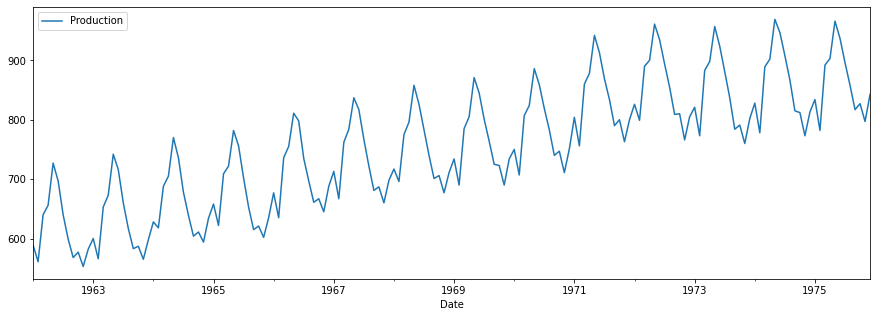

In [3]:
df.plot(figsize=(15,5))

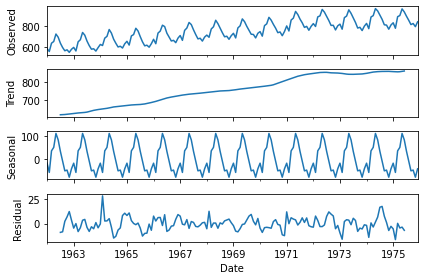

In [4]:
results = seasonal_decompose(df['Production'])
results.plot();

In [5]:
len(df)

168

In [6]:
train = df.iloc[:100]
test = df.iloc[100:]

In [7]:
scaler = MinMaxScaler()

In [8]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [9]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
scaled_train[:10]

array([[0.11320755],
       [0.02515723],
       [0.27358491],
       [0.32389937],
       [0.54716981],
       [0.45283019],
       [0.27358491],
       [0.14465409],
       [0.04716981],
       [0.0754717 ]])

In [11]:
scaled_test[:10]

array([[1.04716981],
       [0.96226415],
       [0.83647799],
       [0.72327044],
       [0.58805031],
       [0.61006289],
       [0.49685535],
       [0.62264151],
       [0.78930818],
       [0.63836478]])

In [12]:
# # define generator
# n_input = 3
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
# generator[0]

In [14]:
# We do the same thing, but now instead for 12 months
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
generator[0]

(array([[[0.11320755],
         [0.02515723],
         [0.27358491],
         [0.32389937],
         [0.54716981],
         [0.45283019],
         [0.27358491],
         [0.14465409],
         [0.04716981],
         [0.0754717 ],
         [0.        ],
         [0.09119497]]]),
 array([[0.14779874]]))

In [15]:
for i in range(len(generator)):
    print(generator[i])

(array([[[0.11320755],
        [0.02515723],
        [0.27358491],
        [0.32389937],
        [0.54716981],
        [0.45283019],
        [0.27358491],
        [0.14465409],
        [0.04716981],
        [0.0754717 ],
        [0.        ],
        [0.09119497]]]), array([[0.14779874]]))
(array([[[0.02515723],
        [0.27358491],
        [0.32389937],
        [0.54716981],
        [0.45283019],
        [0.27358491],
        [0.14465409],
        [0.04716981],
        [0.0754717 ],
        [0.        ],
        [0.09119497],
        [0.14779874]]]), array([[0.0408805]]))
(array([[[0.27358491],
        [0.32389937],
        [0.54716981],
        [0.45283019],
        [0.27358491],
        [0.14465409],
        [0.04716981],
        [0.0754717 ],
        [0.        ],
        [0.09119497],
        [0.14779874],
        [0.0408805 ]]]), array([[0.31446541]]))
(array([[[0.32389937],
        [0.54716981],
        [0.45283019],
        [0.27358491],
        [0.14465409],
        [0.047169

In [16]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11320755 0.02515723 0.27358491 0.32389937 0.54716981 0.45283019
 0.27358491 0.14465409 0.04716981 0.0754717  0.         0.09119497]
Predict this y: 
 [[0.14779874]]


In [17]:
X.shape

(1, 12, 1)

In [18]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit model
model.fit(generator, epochs = 50) # , verbose = 1

Epoch 1/50
88/88 [==============================] - 3s 6ms/step - loss: 0.1949
Epoch 2/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0303
Epoch 3/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0272
Epoch 4/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0199
Epoch 5/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0251
Epoch 6/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0130
Epoch 7/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0115
Epoch 8/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0098
Epoch 9/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0143
Epoch 10/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0111
Epoch 11/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0107
Epoch 12/50
88/88 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 13/50
88/88 [==============================

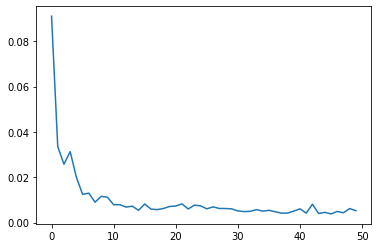

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:
last_train_batch = scaled_train[-n_input:] # scaled_train[-3:] # scaled_train[-12:]

In [22]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [23]:
model.predict(last_train_batch)

array([[1.0012494]], dtype=float32)

In [24]:
scaled_test[0]

array([1.04716981])

In [25]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [26]:
test_predictions

[array([1.0012494], dtype=float32),
 array([0.9852476], dtype=float32),
 array([0.8712651], dtype=float32),
 array([0.72360444], dtype=float32),
 array([0.6185614], dtype=float32),
 array([0.56168133], dtype=float32),
 array([0.5381629], dtype=float32),
 array([0.5649773], dtype=float32),
 array([0.58622587], dtype=float32),
 array([0.6252885], dtype=float32),
 array([0.76879764], dtype=float32),
 array([0.8775532], dtype=float32),
 array([1.0103257], dtype=float32),
 array([1.0432285], dtype=float32),
 array([0.9514055], dtype=float32),
 array([0.7990103], dtype=float32),
 array([0.6780447], dtype=float32),
 array([0.6099685], dtype=float32),
 array([0.5820783], dtype=float32),
 array([0.5807314], dtype=float32),
 array([0.60434055], dtype=float32),
 array([0.6609021], dtype=float32),
 array([0.7684005], dtype=float32),
 array([0.8909896], dtype=float32),
 array([1.0187439], dtype=float32),
 array([1.0899286], dtype=float32),
 array([1.0318336], dtype=float32),
 array([0.88106424], dt

In [27]:
true_predictions = scaler.inverse_transform(test_predictions)

In [28]:
test['Predictions'] = true_predictions

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
test.head()

,Production,Predictions
Date,,
1970-05-01,886,871.397320
1970-06-01,859,866.308741
1970-07-01,819,830.062306
1970-08-01,783,783.106212
1970-09-01,740,749.702521


<AxesSubplot:xlabel='Date'>

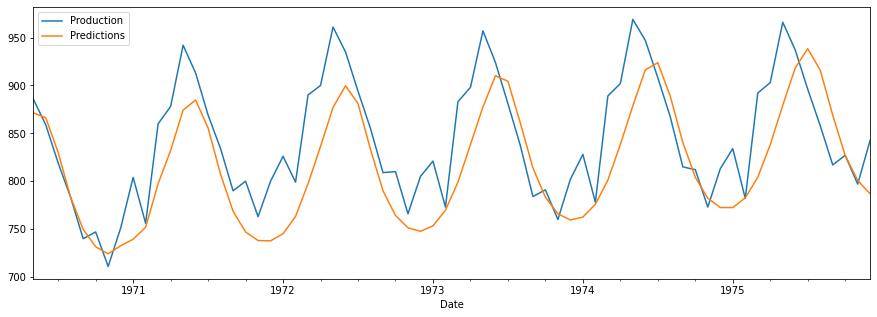

In [30]:
test.plot(figsize=(15,5))

In [31]:
rmse = math.sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

46.873019692598916
